In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

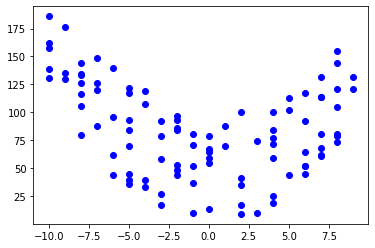

In [2]:
x1 = np.random.randint(-10, 10,100)  #生成10-50之间的100个数据
y1 = x1**2-x1+np.random.randint(1, 100,100)  #生成y1
plt.scatter(x1,y1,c='b')  #绘制散点图
plt.show()

In [3]:
df = pd.read_csv('../data/film.csv') #读取csv数据

In [4]:
df.head()

,filmnum,filmsize,ratio,quality
0,45,106,17,6
1,44,99,15,18
2,61,149,27,10
3,41,97,27,16
4,54,148,30,8


In [5]:
x = df['filmsize']  #取df的后3列为X变量
y = df['filmnum'] #设置y变量

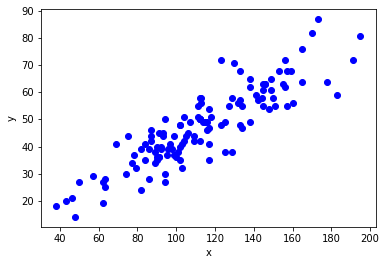

In [6]:
plt.scatter(x,y,c='b')  #绘制散点图
plt.xlabel("x")  # 横轴标识
plt.ylabel("y") # 纵轴标识
plt.show()

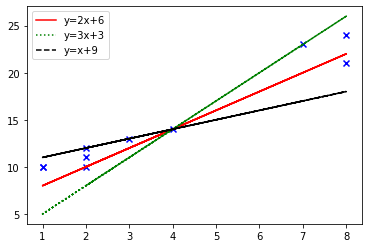

In [7]:
x2 = np.random.randint(1, 10,10)  
y2 = 2*x2+np.random.randint(5, 10,10)  
plt.scatter(x2,y2,c='b',marker='x')
plt.plot(x2,2*x2+6,c='r',label='y=2x+6')
plt.plot(x2,3*x2+2,c='g',linestyle=':',label='y=3x+3')
plt.plot(x2,x2+10,c='black',linestyle='--',label='y=x+9')
plt.legend()
plt.show()

In [8]:
# 从读取的房价数据存储在boston变量中
boston=load_boston()
# 打印boston包含元素
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [9]:
# 打印boston变量名
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
# 将data转换为DataFrame格式以方便展示
bos = pd.DataFrame(boston.data)
# data的第6列数据为RM
print (bos[5].head())

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: 5, dtype: float64


In [11]:
# 将target转换为DataFrame格式以方便展示
bos_target = pd.DataFrame(boston.target)
print(bos_target.head())

      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


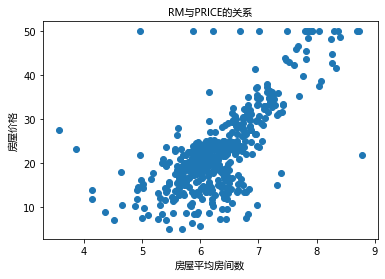

In [12]:
x = bos.iloc[:,5:6]  #选取data中的RM变量
y =bos_target  #设定target为y
# 定义自定义字体，文件名是系统中文字体
myfont = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')
plt.scatter(x, y)
plt.xlabel(u'房屋平均房间数', fontproperties=myfont) #x轴标签设定文字为中文msyh格式
plt.ylabel(u'房屋价格', fontproperties=myfont) #y轴标签设定文字为中文msyh格式
plt.title(u'RM与PRICE的关系', fontproperties=myfont)  #标题
plt.show()

In [13]:
# 把x、y转化为数组形式，以便于计算
x = np.array(x.values)  
y = np.array(y.values) 
#以25%的数据构建测试样本，剩余作为训练样本
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((379, 1), (127, 1), (379, 1), (127, 1))

In [15]:
lr=LinearRegression()  #设定回归算法
lr.fit(x_train,y_train) #使用训练数据进行参数求解

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('求解截距项为：',lr.intercept_)
print('求解系数为：',lr.coef_)

求解截距项为： [-34.06317477]
求解系数为： [[9.01670884]]


In [17]:
y_hat = lr.predict(x_test) #对测试集的预测
y_hat[0:9]  #打印前10个预测值

array([[23.69786208],
       [25.961056  ],
       [10.77691831],
       [24.50034917],
       [36.44748839],
       [14.5368859 ],
       [17.61158361],
       [18.35095374],
       [30.27104283]])

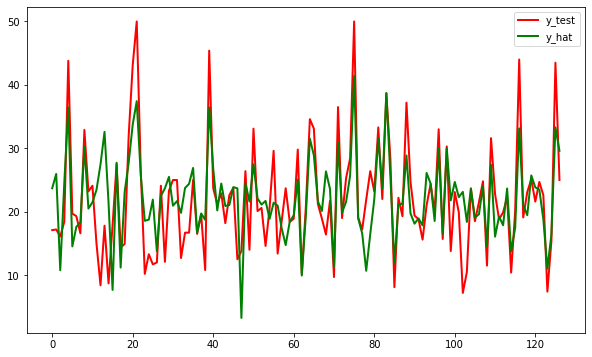

In [18]:
plt.figure(figsize=(10,6))  #设置图片尺寸
t = np.arange(len(x_test))  #创建t变量
#绘制y_test曲线
plt.plot(t, y_test, 'r', linewidth=2, label='y_test') 
#绘制y_test曲线
plt.plot(t, y_hat, 'g', linewidth=2, label='y_hat') 
plt.legend() #设置图例
plt.show()

In [19]:
# 拟合优度R2的输出方法一
print("r2:",lr.score(x_test, y_test))
# 拟合优度R2的输出方法二
print("r2_score:",r2_score(y_test, y_hat)) 
# 用scikit-learn计算MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_hat))
# 用scikit-learn计算MSE
print("MSE:", metrics.mean_squared_error(y_test, y_hat))
# # 用scikit-learn计算RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

r2: 0.5545213753030105
r2_score: 0.5545213753030105
MAE: 4.328198900428095
MSE: 34.035467330047034
RMSE: 5.833992400581872


In [20]:
# 构建最小二乘回归函数
def linefit(x, y):
    N = len(x)  #计算样本值N
    sx,sy,sxx,syy,sxy=0,0,0,0,0  #设置初始值
    for i in range(0,N):  
        sx  += x[i]  #计算xi的总和
        sy  += y[i]  #计算yi的总和
        sxx += x[i]*x[i]  #计算xi平方的总和
        syy += y[i]*y[i]  #计算yi平方的总和
        sxy += x[i]*y[i]  #计算xi*yi的总和
    a = (sy*sx/N -sxy)/(sx*sx/N -sxx)  #求解系数a
    b = (sy-a*sx)/N  #求解系数b
    return a, b      

In [21]:
a,b = linefit(x_train,y_train) #求解参数a、b
y_hat1 = a * x_test + b  #对测试集的y值进行预测
# 用scikit-learn计算MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_hat1))
# 用scikit-learn计算MSE
print("MSE:", metrics.mean_squared_error(y_test, y_hat1))
# # 用scikit-learn计算RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat1)))

MAE: 4.328198900428169
MSE: 34.03546733004737
RMSE: 5.8339924005819
